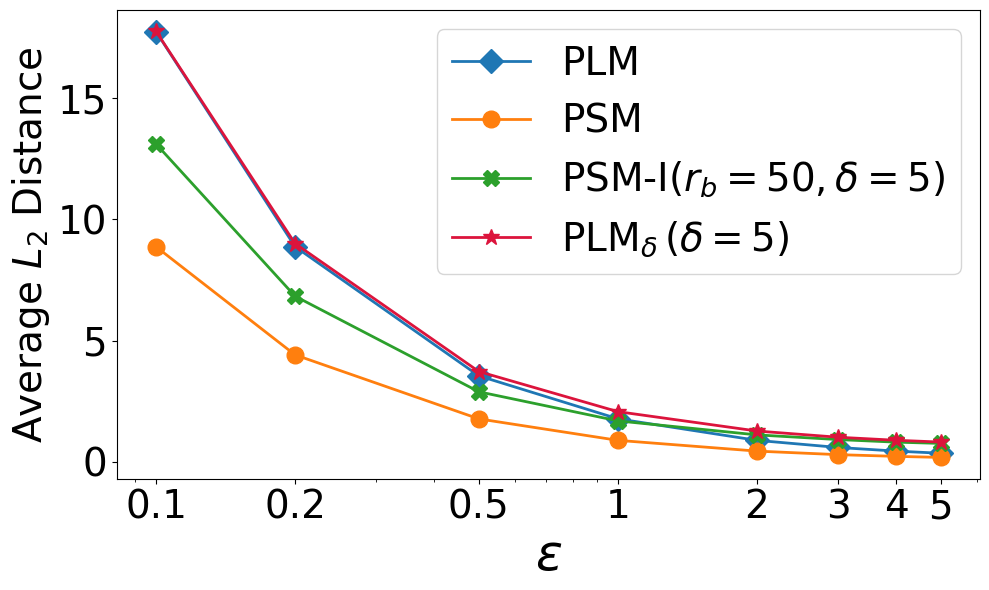

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def generate_distance_plots(data_dir, figure_dir, dataset_name, distance_type):
    """
    Generates and saves distance plots for the specified dataset.

    Parameters:
    - data_dir: The base directory for accessing the dataset CSV files.
    - figure_dir: The base directory for saving the figure plots.
    - dataset_name: The name of the dataset (e.g., 'uci', 'geolife', 'tdrive').
    - distance_type: The type of distance metric to plot ('L1' or 'L2').
    """
    # Directory containing perturbation method CSV files
    perturbation_methods_dir = os.path.join(data_dir, dataset_name, 'perturbed')
    perturbation_methods = ['laplace', 'staircase', 'our_bl_50_delta_5', 'laplace_delta_5']
    mean_distances = {}

    for method in perturbation_methods:
        method_dir = os.path.join(perturbation_methods_dir, method)
        files = sorted([f for f in os.listdir(method_dir) if f.endswith('.csv')])

        distances = []

        for file in files:
            file_path = os.path.join(method_dir, file)
            df = pd.read_csv(file_path)
            distance_column = 'l1_distance' if distance_type == 'L1' else 'l2_distance'
            distances.append(df[distance_column].mean())

        mean_distances[method] = distances

    epsilon_values = [0.1, 0.2, 0.5, 1, 2, 3, 4, 5]
    plt.figure(figsize=(10, 6))

    plot_attributes = [
        {'label': r'PLM', 'color': '#1F77B4', 'marker': 'D'},
        {'label': 'PSM', 'color': '#FF7F0E', 'marker': 'o'},
        {'label': 'PSM-I$(r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X'},
        {'label': r'PLM$_{\delta}\,(\delta=5)$', 'color': '#DC143C', 'marker': '*'}
    ]

    for i, method in enumerate(perturbation_methods):
        plt.plot(epsilon_values, mean_distances[method], label=plot_attributes[i]['label'], color=plot_attributes[i]['color'], marker=plot_attributes[i]['marker'], linestyle='solid', linewidth=2, markersize=12)

    plt.xlabel('$\epsilon$', fontsize=36)
    distance_label = 'Average $L_1$ Distance' if distance_type == 'L1' else 'Average $L_2$ Distance'
    plt.ylabel(distance_label, fontsize=28)
    plt.xscale('log')
    plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
    plt.tick_params(axis='both', which='major', labelsize=28)
    plt.legend(fontsize=28, frameon=True)
    plt.tight_layout()

    # Ensure the figure directory exists
    figure_base_dir = os.path.join(figure_dir, dataset_name, 'figure')
    png_dir = os.path.join(figure_base_dir, 'png')
    svg_dir = os.path.join(figure_base_dir, 'svg')
    os.makedirs(png_dir, exist_ok=True)
    os.makedirs(svg_dir, exist_ok=True)

    # Save the plot
    filename_suffix = f'{dataset_name}_{distance_type.lower()}_distance'
    pathpng = os.path.join(png_dir, f'{filename_suffix}.png')
    pathsvg = os.path.join(svg_dir, f'{filename_suffix}.svg')

    plt.savefig(pathpng, dpi=300, bbox_inches='tight')
    plt.savefig(pathsvg, format='svg', bbox_inches='tight')
    plt.show()

# Example usage:
data_dir = "C:\\Users\\ss6365\\Desktop\\location_privacy_final"
figure_dir = data_dir  # Assuming the figure directory is relative to the data directory


dataset_name = 'tdrive'


generate_distance_plots(data_dir, figure_dir, dataset_name, 'L2')


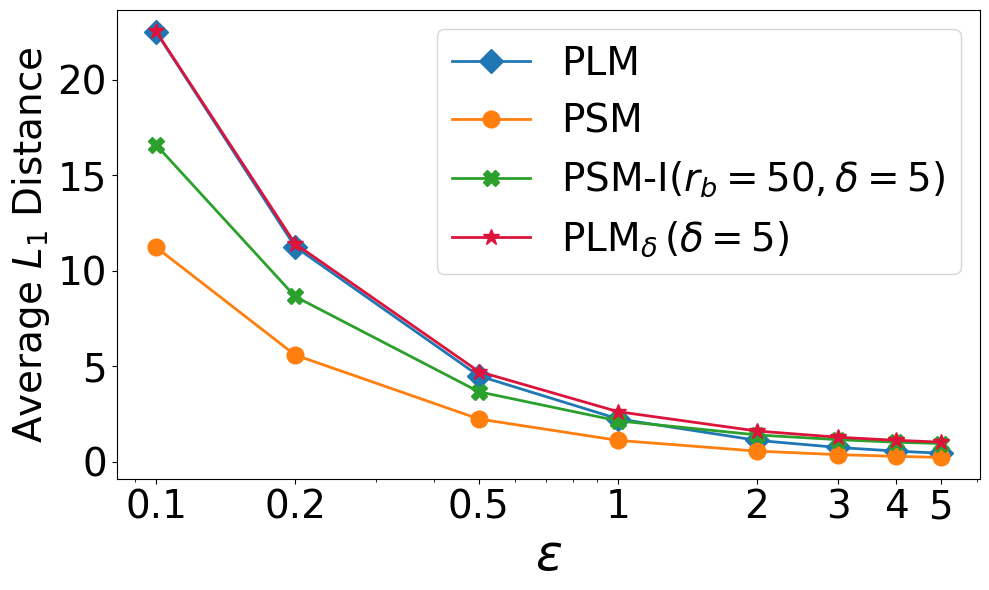

In [3]:
generate_distance_plots(data_dir, figure_dir, dataset_name, 'L1')